In [1248]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [1249]:
#Importo el DataFrame que he limpiado en mi jn de "Cleaning"
Visual= pd.read_csv("../DATA_limpia/attackv3.csv",encoding="ISO-8859–1")
Visual

,case_number,date,year,country,activity,sex_,age,fatal_yn,species_,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality
0,2018.06.25,25-Jun-2018,2018.0,ADMIRALTY ISLANDS,Paddling,F,57,N,White shark,2018,Boat,ADMIRALTY ISLANDS,F,57,Jun,N
1,2018.06.18,18-Jun-2018,2018.0,AFRICA,Standing,F,11,N,NaN,2018,Unprovoked,AFRICA,F,11,Jun,N
2,2018.06.09,09-Jun-2018,2018.0,ALGERIA,Surfing,M,48,N,NaN,2018,No_Info,ALGERIA,M,48,Jun,N
3,2018.06.08,08-Jun-2018,2018.0,AMERICAN SAMOA,Surfing,M,NaN,N,2 m shark,2018,Unprovoked,AMERICAN SAMOA,M,No_Info,Jun,N
4,2018.06.04,04-Jun-2018,2018.0,AMERICAN SAMOA,Free diving,M,NaN,N,"Tiger shark, 3m",2018,Provoked,AMERICAN SAMOA,M,No_Info,Jun,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,-,NaN,NAN,NaN,No_Info,No_Info,NaN
8699,0,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,-,NaN,NAN,NaN,No_Info,No_Info,NaN
8700,0,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,-,NaN,NAN,NaN,No_Info,No_Info,NaN
8701,0,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,-,NaN,NAN,NaN,No_Info,No_Info,NaN


In [1250]:
Visual["Months"].unique()

array(['Jun', 'May', 'No_Info', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov',
       'Oct', 'Sep', 'Aug', 'Jul'], dtype=object)

In [1251]:
#Elimino columnas que no voy a utilizar en mis gráficos para probar mis hipótesis
Visual.drop(["date","year","case_number","country","activity","species_","sex_"],axis=1,inplace=True)

In [1252]:
V11=Visual.copy()

In [1253]:
Visual["Months"].unique()

array(['Jun', 'May', 'No_Info', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov',
       'Oct', 'Sep', 'Aug', 'Jul'], dtype=object)

In [1254]:
#Creo una función para reemplazar los valores de Y/N por 0/1,respectivamente, y por "-" si no hay información. 
#Luego aplico la función a la la columna con un map.
def Fat(x):
    if x=="Y":
        return 1
    elif x=="N":
        return 0
    else:
        return "-"

In [1255]:
lista_fatal=Visual["Fatality"]
Fatality=map(Fat,lista_fatal)
Fatal=list(Fatality)
Visual["Fatality"]=Fatal

In [1256]:
Visual["Fatality"].unique() #compruebo que ahora únicamente hay valores (0,1,"-")

array([0, 1, '-'], dtype=object)

In [1257]:
#Quiero ver donde se concentrarn los ataques,ya que tenemos datos desde muchos años.
#1.Convierto años en integer ya que es una lista de Str.
#2.Sustituyo "cambio" como nuevo valor de mi fila (Serie) de string a numérico.
cambio=pd.to_numeric(Serie)
Visual["Year_2"]=cambio

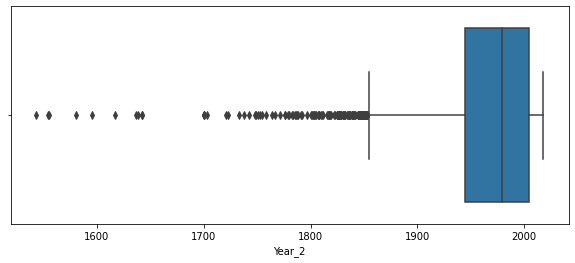

In [1258]:
from matplotlib import rcParams
#Vemos que los ataques se concentran a partir de 1950 aprox.
sns.boxplot(x="Year_2", data=Visual)
rcParams['figure.figsize'] = 10,4;

In [1259]:
#Limpiamos la matriz para ver si los meses influyen en la cantidad de ataques

In [1260]:
#Convertimos los meses en números y aplicamos la función con un maps
def Meses2(x):
    if x=="Jan":
        return 1
    elif x=='Feb':
        return 2
    elif x=='Mar':
        return 3
    elif x=='Apr':
        return 4
    elif x=='May':
        return 5
    elif x=='Jun':
        return 6
    elif x=='Jul':
        return 7
    elif x=='Aug':
        return 8
    elif x=='Sep':
        return 9
    elif x=='Oct':
        return 10
    elif x=='Nov':
        return 11
    elif x=='Dec':
        return 12

In [1261]:
MESES=list(Visual["Months"])

In [1262]:
#Comprobamos que se ha hecho bien el map
Meses_2=map(Meses2,MESES)
Meses_3=list(Meses_2)
#Cambiamos la nueva columna con los meses como números
Visual["Months"]=Meses_3

In [1263]:
filtro=V1[(V1["Months"]!="-") & (V1["Year_2"]>=1950)]
filtro

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality
0,57,N,2018.0,Boat,ADMIRALTY ISLANDS,F,57,6.0,0
1,11,N,2018.0,Unprovoked,AFRICA,F,11,6.0,0
2,48,N,2018.0,No_Info,ALGERIA,M,48,6.0,0
3,NaN,N,2018.0,Unprovoked,AMERICAN SAMOA,M,No_Info,6.0,0
4,NaN,N,2018.0,Provoked,AMERICAN SAMOA,M,No_Info,6.0,0
...,...,...,...,...,...,...,...,...,...
4493,NaN,Y,1950.0,Unprovoked,USA,NaN,No_Info,NaN,1
4494,NaN,Y,1950.0,Unprovoked,USA,M,No_Info,NaN,1
4495,NaN,N,1950.0,Unprovoked,USA,M,No_Info,NaN,0
4496,NaN,N,1950.0,Unprovoked,USA,M,No_Info,NaN,0


In [1264]:
#Hago filtro para obtener el df que quiero para la primera visualización
filtro = V1[(V1['Months'] !='No_Info')&(V1['Year_2'] >= 1950)]
filtro

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality
0,57,N,2018.0,Boat,ADMIRALTY ISLANDS,F,57,6.0,0
1,11,N,2018.0,Unprovoked,AFRICA,F,11,6.0,0
2,48,N,2018.0,No_Info,ALGERIA,M,48,6.0,0
3,NaN,N,2018.0,Unprovoked,AMERICAN SAMOA,M,No_Info,6.0,0
4,NaN,N,2018.0,Provoked,AMERICAN SAMOA,M,No_Info,6.0,0
...,...,...,...,...,...,...,...,...,...
4493,NaN,Y,1950.0,Unprovoked,USA,NaN,No_Info,NaN,1
4494,NaN,Y,1950.0,Unprovoked,USA,M,No_Info,NaN,1
4495,NaN,N,1950.0,Unprovoked,USA,M,No_Info,NaN,0
4496,NaN,N,1950.0,Unprovoked,USA,M,No_Info,NaN,0


In [1265]:
Visual["Fatality"].unique()

array([0, 1, '-'], dtype=object)

<AxesSubplot:xlabel='Year_2', ylabel='Count'>

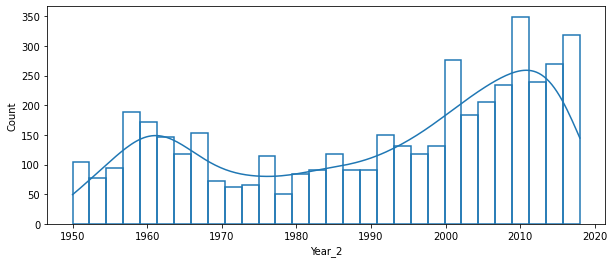

In [1266]:
#Analizamos los años en la franja de 1950-2020 y vemos que desde el 2000 los casos han ido aumentando.
sns.histplot(x=filtro.Year_2, bins=30, fill=None, kde=True)

<AxesSubplot:xlabel='Months'>

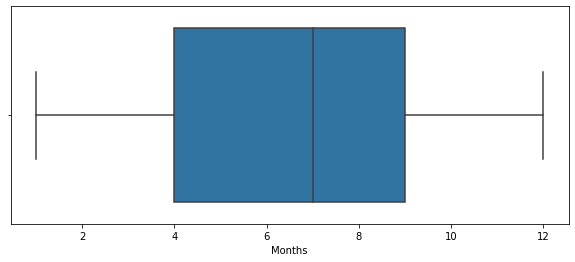

In [1267]:
#Al igual que los años, vemos que los ataques se concentran en los meses de verano (boreal) e invierno (austral) ya que 
#los ataques se concentran más en Australia,USA y Sudáfrica (más adelante)
sns.boxplot(x="Months", data=Visual)

In [1268]:
Visual.groupby("Months").count() #En Enero=494 ataques

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Fatality
Months,,,,,,,,
1.0,275,442,492,494,494,434,494,494
2.0,194,335,356,356,356,321,356,356
3.0,224,350,379,378,379,349,379,379
4.0,261,375,420,420,420,397,420,420
5.0,222,332,357,358,358,332,358,358
6.0,286,435,473,475,475,445,475,475
7.0,399,568,618,620,621,581,621,621
8.0,354,488,552,553,553,518,553,553
9.0,327,486,520,518,520,487,520,520


In [1269]:
#agrupo las edades por Rangos

In [1270]:
EDADES=list(Visual["Ages_2"])

In [1271]:
Rango1=[str(i) for i in range(0,11)]
Rango2=[str(i) for i in range(0,21)]
Rango3=[str(i) for i in range(0,31)]
Rango4=[str(i) for i in range(0,41)]
Rango5=[str(i) for i in range(0,51)]
Rango6=[str(i) for i in range(0,61)]
Rango7=[str(i) for i in range(0,71)]
Rango8=[str(i) for i in range(0,81)]
Rango9=[str(i) for i in range(0,91)]

In [1272]:
def Rango(x):
    if x in Rango1:
        return 10
    elif x in Rango2:
        return 20
    elif x in Rango3:
        return 30
    elif x in Rango4:
        return 40
    elif x in Rango5:
        return 50
    elif x in Rango6:
        return 60
    elif x in Rango7:
        return 70
    elif x in Rango8:
        return 80
    elif x in Rango9:
        return 90
    else:
        return "-"

In [1273]:
New_Age=map(Rango,EDADES)
Ages3=list(New_Age)
Visual["Ages_"]=Ages3

In [1274]:
surfistas1=filtro.groupby(['Year_2','Months']).agg({'age':'count'}).reset_index().rename(columns={"age":"Personas"})
surfistas1

,Year_2,Months,Personas
0,1950.0,1.0,0
1,1950.0,2.0,1
2,1950.0,3.0,1
3,1950.0,4.0,1
4,1950.0,5.0,1
...,...,...,...
765,2018.0,2.0,7
766,2018.0,3.0,4
767,2018.0,4.0,12
768,2018.0,5.0,7


In [1275]:
surfistas2=filtro.groupby(['Year_2']).agg({'age':'count'}).reset_index().rename(columns={"age":"Personas"})
surfistas2

,Year_2,Personas
0,1950.0,19
1,1951.0,22
2,1952.0,10
3,1953.0,14
4,1954.0,19
...,...,...
64,2014.0,82
65,2015.0,117
66,2016.0,100
67,2017.0,90


In [1276]:
filtro_surfistas = surfistas[(surfistas['Year_2'] >= 2000)]
filtro_surfistas

,Year_2,Personas
50,2000.0,69
51,2001.0,67
52,2002.0,79
53,2003.0,71
54,2004.0,64
55,2005.0,76
56,2006.0,80
57,2007.0,84
58,2008.0,91
59,2009.0,82


In [1277]:
sns.lineplot(data=filtro_surfistas, x="Year_2", y="Personas", hue="Months")
rcParams['figure.figsize'] = 12,6;

ValueError: Could not interpret value `Months` for parameter `hue`

<AxesSubplot:xlabel='Year_2', ylabel='Personas'>

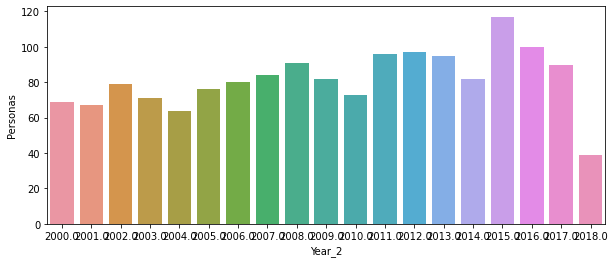

In [1278]:
sns.barplot(x="Year_2", y="Personas", data=filtro_surfistas, ci="sd")

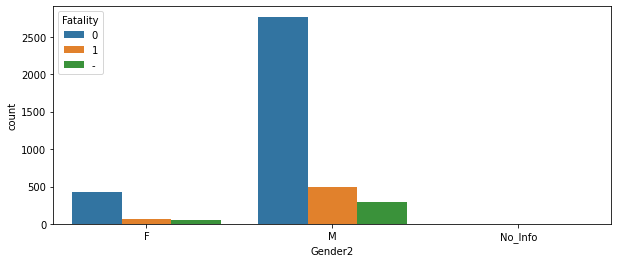

In [1279]:
sns.countplot(data=filtro, x="Gender2", hue="Fatality")
rcParams['figure.figsize'] = 10,2;

In [1280]:
#Vamos a ver si está muy concentrado en ciertos países. 

In [1281]:
paises2= list(V1["country_2"].value_counts().head(8).keys())

In [1282]:
paises2.remove("NAN")

In [1283]:
#Al ver el numero de registro por país, vemos que (sin tener en cuenta los NAN),son 7 los que tienen más de 100. Nos vamos a
#centrar en estos 7.
paises = V1[["country_2"]].value_counts()
paises_df=pd.DataFrame(paises)
paises_df.head(8)

,0
country_2,
NAN,2451
USA,2229
AUSTRALIA,1338
SOUTH AFRICA,579
PAPUA NEW GUINEA,134
NEW ZEALAND,128
BRAZIL,112
BAHAMAS,109


In [1284]:
paises_top = Visual[Visual['country_2'].isin(paises2)]
paises_top

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality,Ages_
31,56,N,2018.0,No_Info,AUSTRALIA,M,56,4.0,0,60
32,NaN,N,2018.0,Unprovoked,AUSTRALIA,NaN,No_Info,4.0,0,-
33,12,N,2018.0,Unprovoked,AUSTRALIA,M,12,4.0,0,20
34,19,N,2018.0,Unprovoked,AUSTRALIA,M,19,4.0,0,20
35,25,N,2018.0,Unprovoked,AUSTRALIA,M,25,3.0,0,30
...,...,...,...,...,...,...,...,...,...,...
6195,NaN,N,NaN,Provoked,USA,M,No_Info,NaN,0,-
6196,NaN,N,NaN,Unprovoked,USA,M,No_Info,NaN,0,-
6197,NaN,N,NaN,Unprovoked,USA,NaN,No_Info,NaN,0,-
6198,NaN,N,NaN,Unprovoked,USA,F,No_Info,NaN,0,-


In [1285]:
sns.histplot(data=filtro, x="Age", hue="Survived");

ValueError: Could not interpret value `Age` for parameter `x`

In [1286]:
datos = paises_top.country_2.value_counts()

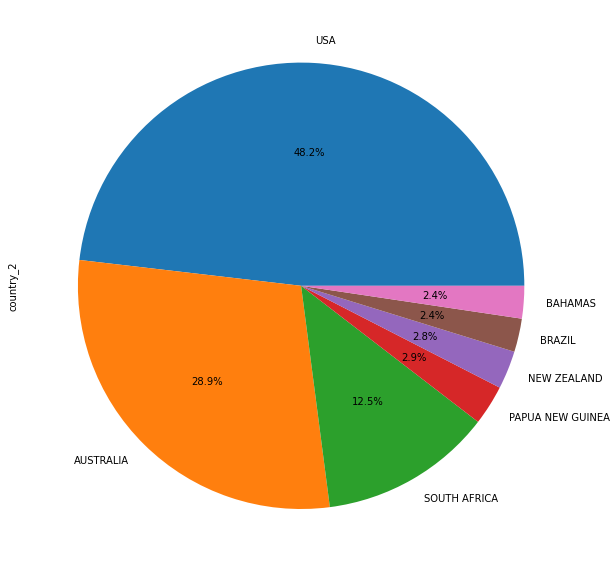

In [1290]:
datos.plot.pie(autopct="%.1f%%")
rcParams['figure.figsize'] = 10,12;

In [1293]:
paises_años2 = Visual[(Visual['country_2'].isin(paises2))&(Visual['Year_2'] >= 1950)&(Visual["Fatality"]==1)]
paises_años2

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality,Ages_
58,49,Y,2017.0,Unprovoked,AUSTRALIA,F,49,11.0,1,50
59,NaN,Y,2017.0,Sea Disaster,AUSTRALIA,NaN,No_Info,11.0,1,-
64,22,Y,2017.0,Unprovoked,AUSTRALIA,M,22,11.0,1,30
91,NaN,Y,2017.0,Unprovoked,AUSTRALIA,M,No_Info,9.0,1,-
144,33,Y,2017.0,Unprovoked,AUSTRALIA,M,33,5.0,1,40
...,...,...,...,...,...,...,...,...,...,...
4482,14,Y,1950.0,Unprovoked,USA,M,14,2.0,1,20
4488,NaN,Y,1950.0,Unprovoked,USA,M,No_Info,NaN,1,-
4489,7 or 8,Y,1950.0,Unprovoked,USA,M,No_Info,NaN,1,-
4493,NaN,Y,1950.0,Unprovoked,USA,NaN,No_Info,NaN,1,-


In [1302]:
paises_años = Visual[(Visual['country_2'].isin(paises2))& (Visual['Year_2'] >= 1950)&(Visual["Fatality"]==1)&(Visual["Ages_"]!="-")]
paises_años #revisar y hacer todos los filtros

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality,Ages_
58,49,Y,2017.0,Unprovoked,AUSTRALIA,F,49,11.0,1,50
64,22,Y,2017.0,Unprovoked,AUSTRALIA,M,22,11.0,1,30
144,33,Y,2017.0,Unprovoked,AUSTRALIA,M,33,5.0,1,40
149,28,Y,2017.0,Unprovoked,AUSTRALIA,M,28,4.0,1,30
155,17,Y,2017.0,Unprovoked,AUSTRALIA,F,17,4.0,1,20
...,...,...,...,...,...,...,...,...,...,...
4466,19,Y,1950.0,Unprovoked,USA,M,19,7.0,1,20
4473,25,Y,1950.0,Sea Disaster,USA,M,25,6.0,1,30
4476,50,Y,1950.0,Sea Disaster,USA,M,50,4.0,1,50
4479,20,Y,1950.0,Unprovoked,USA,M,20,3.0,1,20


In [1303]:
paises_años2["Ages_"].unique()

array([50, '-', 30, 40, 20, 60, 70, 80, 10], dtype=object)

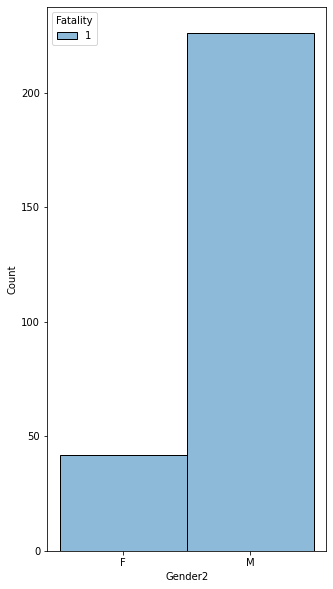

In [1305]:
sns.histplot(data=paises_años, x="Gender2", hue="Fatality");
rcParams['figure.figsize'] = 5,10;

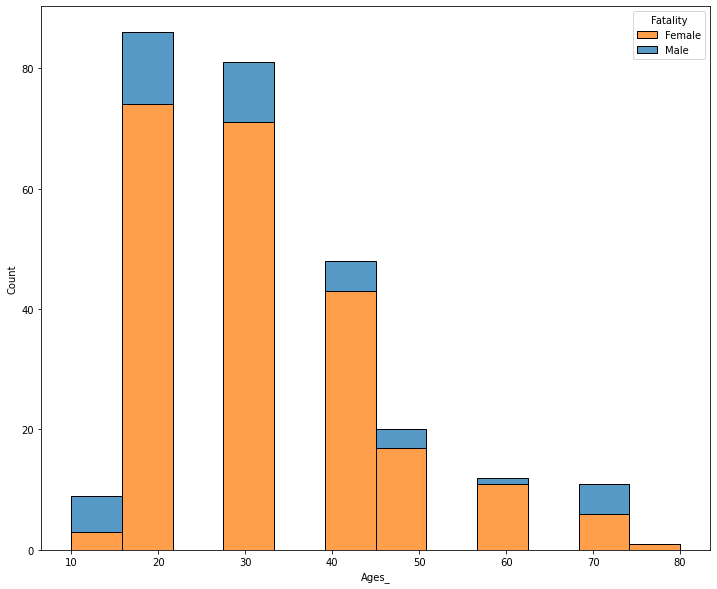

In [1332]:
sns.histplot(data=paises_años, x= "Ages_", hue="Gender2", multiple="stack")
plt.legend(title='Fatality', labels=['Female', 'Male'])
rcParams['figure.figsize'] = 12,10; #visualizan los que han muerto

In [1310]:
paises_años3 = Visual[(Visual['country_2'].isin(paises2))& (Visual['Year_2'] >= 1950)&(Visual["Fatality"]!="-")&(Visual["Ages_"]!="-")]
paises_años3 #revisar y hacer todos los filtros

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality,Ages_
31,56,N,2018.0,No_Info,AUSTRALIA,M,56,4.0,0,60
33,12,N,2018.0,Unprovoked,AUSTRALIA,M,12,4.0,0,20
34,19,N,2018.0,Unprovoked,AUSTRALIA,M,19,4.0,0,20
35,25,N,2018.0,Unprovoked,AUSTRALIA,M,25,3.0,0,30
36,10,N,2018.0,Unprovoked,AUSTRALIA,M,10,3.0,0,10
...,...,...,...,...,...,...,...,...,...,...
4473,25,Y,1950.0,Sea Disaster,USA,M,25,6.0,1,30
4474,27,N,1950.0,Unprovoked,USA,M,27,5.0,0,30
4476,50,Y,1950.0,Sea Disaster,USA,M,50,4.0,1,50
4479,20,Y,1950.0,Unprovoked,USA,M,20,3.0,1,20


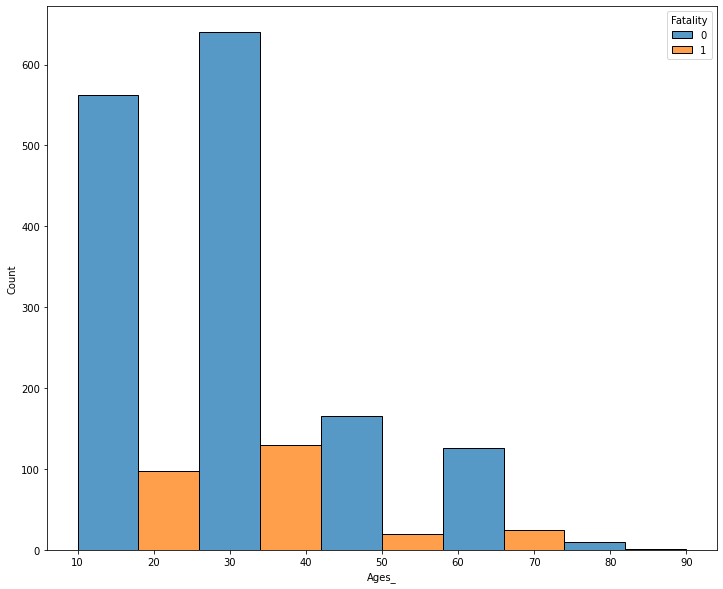

In [1331]:
sns.histplot(data=paises_años3, x="Ages_", hue="Fatality", multiple="dodge", bins=5)
rcParams['figure.figsize'] = 12,10; #aqui dejo Fatality 1 y 2

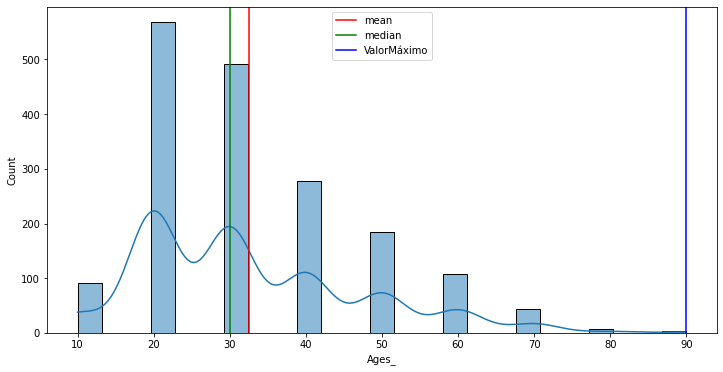

In [1319]:
graf = sns.histplot(x=paises_años3.Ages_, kde=True) # Hemos guardado el gráfico como una variable
graf.axvline(x=paises_años3.Ages_.mean(), c="red", label="mean")
graf.axvline(x=paises_años3.Ages_.median(), c="green", label="median")
graf.axvline(x=paises_años3.Ages_.max(), c="blue", label="ValorMáximo") #Sobre la vertical marcamos eje x
rcParams['figure.figsize'] = 12,10
plt.legend();

In [1320]:
Visual["Type_attack"].unique()

array(['Boat', 'Unprovoked', 'No_Info', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

In [1328]:
paises_an = Visual[(Visual['country_2'].isin(paises2))& (Visual['Year_2'] >= 1950)&(Visual["Fatality"]!="-")&(Visual["Ages_"]!="-")&(Visual["Type_attack"]=="Provoked") | (Visual["Type_attack"]=="Unprovoked")] 
paises_an #revisar y hacer todos los filtros

,age,fatal_yn,Year_2,Type_attack,country_2,Gender2,Ages_2,Months,Fatality,Ages_
1,11,N,2018.0,Unprovoked,AFRICA,F,11,6.0,0,20
3,NaN,N,2018.0,Unprovoked,AMERICAN SAMOA,M,No_Info,6.0,0,-
5,NaN,N,2018.0,Unprovoked,AMERICAN SAMOA,M,No_Info,6.0,0,-
6,18,Y,2018.0,Unprovoked,ANDAMAN ISLANDS,M,18,6.0,1,20
7,52,N,2018.0,Unprovoked,ANDAMAN ISLANDS,M,52,5.0,0,60
...,...,...,...,...,...,...,...,...,...,...
6297,NaN,Y,NaN,Unprovoked,NAN,M,No_Info,NaN,1,-
6298,NaN,Y,NaN,Unprovoked,NAN,M,No_Info,NaN,1,-
6299,NaN,Y,NaN,Unprovoked,NAN,M,No_Info,NaN,1,-
6300,NaN,Y,NaN,Unprovoked,NAN,M,No_Info,NaN,1,-


In [1330]:
paises_an["Type_attack"].unique()

array(['Unprovoked', 'Provoked'], dtype=object)

In [ ]:
#unir provocados con Mujeres/Hombres y paises